In [150]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:
import pandas as pd
data='/home/luis/Desktop/PDG/data/flair_df.csv'
try:
    df = pd.read_csv(data)
    display(df.head())
except FileNotFoundError:
    print("Error: 'flair_df.csv' not found. Please ensure the file exists in the current directory.")
    df = None # Assign None to df in case of error
except pd.errors.ParserError:
    print("Error: Could not parse 'flair_df.csv'. Please check the file format.")
    df = None # Assign None to df in case of error

,Id,Spacing.a,Spacing.b,Spacing.c,Size.a,Size.b,Size.c,Spacing.1.a,Spacing.1.b,Spacing.1.c,...,SmallAreaHighGrayLevelEmphasis,SmallAreaLowGrayLevelEmphasis,ZoneEntropy,ZonePercentage,ZoneVariance,Busyness,Coarseness,Complexity,Contrast.1,Strength
0,0.783201,1.000000,1.000000,1.0,256,256,176,1.000000,1.000000,1.0,...,8.206635,0.045654,4.696937,0.057143,4440.166667,4.608822,0.007719,5.665917,0.021313,0.109595
1,0.729412,1.000000,1.000000,1.0,256,256,176,1.000000,1.000000,1.0,...,11.484619,0.047595,5.422075,0.103538,829.483942,6.779884,0.004074,11.919254,0.028828,0.088929
2,0.662097,0.976563,0.976562,1.0,256,256,176,0.976563,0.976562,1.0,...,18.742992,0.031491,5.453404,0.162454,945.911273,4.835655,0.002515,32.396035,0.017710,0.130043
3,0.782308,0.898438,0.898438,0.9,256,256,192,0.898438,0.898438,0.9,...,14.097366,0.037158,5.047446,0.086413,2961.200744,2.635198,0.006769,12.410246,0.021700,0.228678
4,0.585369,0.718750,0.718750,6.5,260,320,26,0.718750,0.718750,6.5,...,129.169944,0.005191,5.763565,0.272459,85.110375,0.527647,0.006528,96.167007,0.037276,0.891463


In [152]:
df.set_index('Id', inplace=True)
df 

,Spacing.a,Spacing.b,Spacing.c,Size.a,Size.b,Size.c,Spacing.1.a,Spacing.1.b,Spacing.1.c,Size.1.a,...,SmallAreaHighGrayLevelEmphasis,SmallAreaLowGrayLevelEmphasis,ZoneEntropy,ZonePercentage,ZoneVariance,Busyness,Coarseness,Complexity,Contrast.1,Strength
Id,,,,,,,,,,,,,,,,,,,,,
0.783201,1.000000,1.000000,1.0,256,256,176,1.000000,1.000000,1.0,256,...,8.206635,0.045654,4.696937,0.057143,4440.166667,4.608822,0.007719,5.665917,0.021313,0.109595
0.729412,1.000000,1.000000,1.0,256,256,176,1.000000,1.000000,1.0,256,...,11.484619,0.047595,5.422075,0.103538,829.483942,6.779884,0.004074,11.919254,0.028828,0.088929
0.662097,0.976563,0.976562,1.0,256,256,176,0.976563,0.976562,1.0,256,...,18.742992,0.031491,5.453404,0.162454,945.911273,4.835655,0.002515,32.396035,0.017710,0.130043
0.782308,0.898438,0.898438,0.9,256,256,192,0.898438,0.898438,0.9,256,...,14.097366,0.037158,5.047446,0.086413,2961.200744,2.635198,0.006769,12.410246,0.021700,0.228678
0.585369,0.718750,0.718750,6.5,260,320,26,0.718750,0.718750,6.5,260,...,129.169944,0.005191,5.763565,0.272459,85.110375,0.527647,0.006528,96.167007,0.037276,0.891463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.774391,0.976563,0.976562,1.0,256,256,176,0.976563,0.976562,1.0,256,...,11.234046,0.029563,5.046687,0.069349,4020.625255,3.634234,0.005374,10.826227,0.015235,0.146290
0.720461,1.015625,1.015625,1.0,256,256,176,1.015625,1.015625,1.0,256,...,19.207829,0.058029,5.347434,0.126780,1076.402073,4.376087,0.003218,20.278620,0.031107,0.126415
0.601364,0.718750,0.718750,6.5,260,320,24,0.718750,0.718750,6.5,260,...,311.880479,0.002000,6.406543,0.243104,85.288385,0.353731,0.002340,447.587022,0.014982,2.279072


In [153]:
df_meta=df.select_dtypes(include=['object'])
df.drop(columns = df_meta.columns, inplace=True)

**Reasoning**:
The dataframe is loaded and the object type columns are deleted. Now, perform EDA.



Missing values per column:
 Spacing.a     0
Spacing.b     0
Spacing.c     0
Size.a        0
Size.b        0
             ..
Busyness      0
Coarseness    0
Complexity    0
Contrast.1    0
Strength      0
Length: 121, dtype: int64

Number of duplicated rows: 0

Summary Statistics:
         Spacing.a   Spacing.b   Spacing.c      Size.a      Size.b      Size.c  \
count  128.000000  128.000000  128.000000  128.000000  128.000000  128.000000   
mean     0.819876    0.819876    3.670887  290.937500  312.625000   97.703125   
std      0.198717    0.198717    2.598659   85.634248   95.277051   76.685200   
min      0.449219    0.449219    0.900000  200.000000  200.000000   24.000000   
25%      0.718750    0.718750    1.000000  256.000000  256.000000   24.000000   
50%      0.898438    0.898438    4.250000  256.000000  256.000000   40.000000   
75%      0.976563    0.976563    6.250000  260.000000  320.000000  176.000000   
max      1.015625    1.015625    7.000000  512.000000  512.000000  208

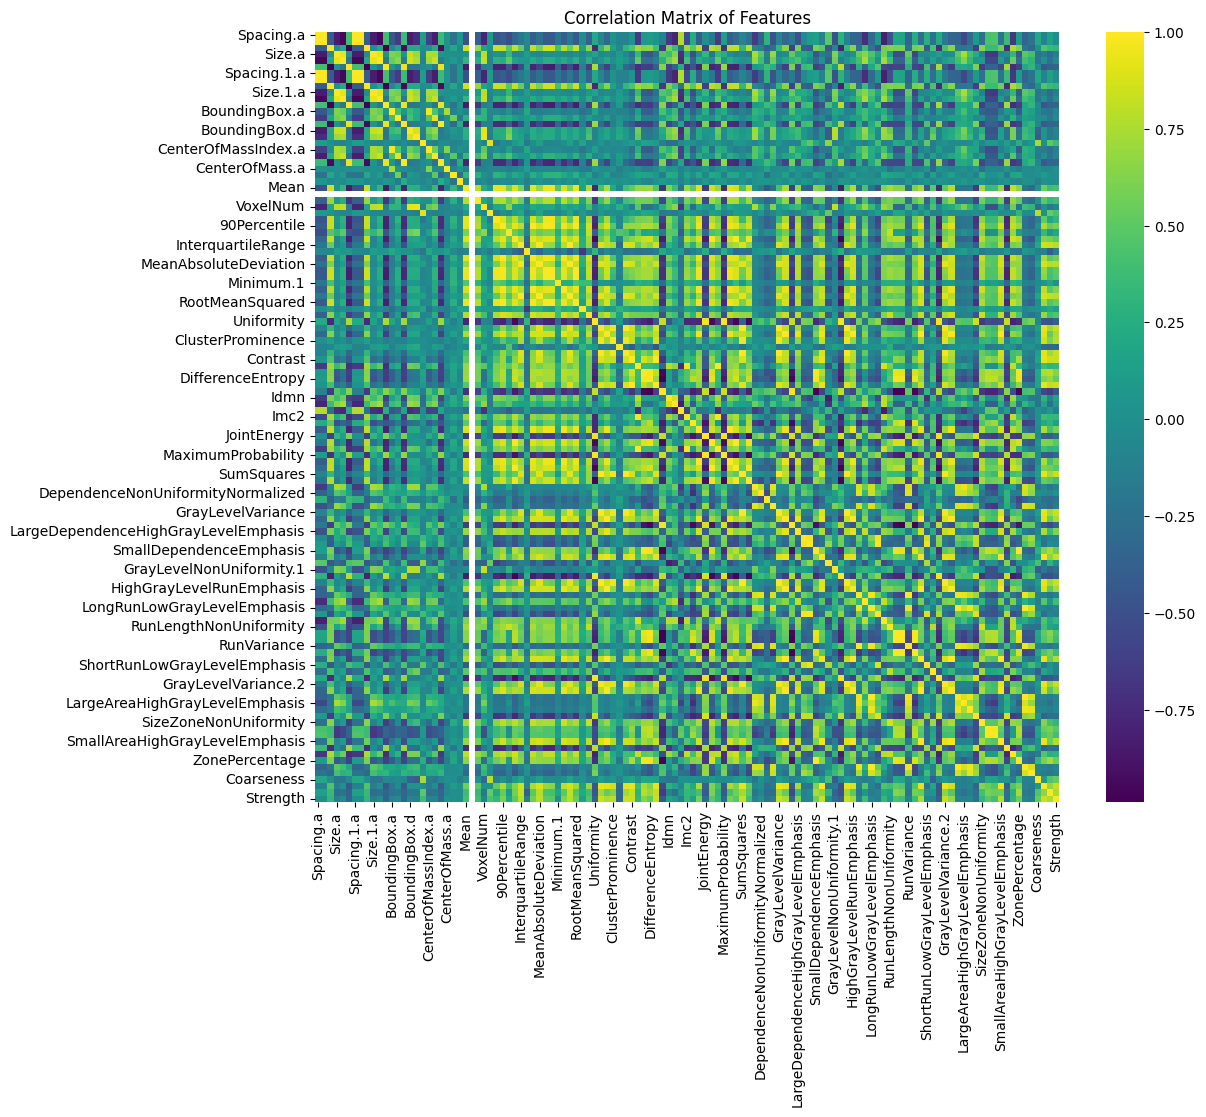

'\n# Histograms of numerical features\ndf.hist(figsize=(20, 20), bins=50)\nplt.suptitle("Histograms of Numerical Features")\nplt.show()\n\n# Pairplot for a subset of features\nsns.pairplot(df[[\'Strength\', \'Size.a\', \'Size.b\', \'Size.c\']], diag_kind="kde")\nplt.suptitle("Pairplot of Selected Features")\nplt.show()'

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Check for duplicated rows
print(f"\nNumber of duplicated rows: {df.duplicated().sum()}")

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='viridis')
plt.title("Correlation Matrix of Features")
plt.show()
'''
# Histograms of numerical features
df.hist(figsize=(20, 20), bins=50)
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Pairplot for a subset of features
sns.pairplot(df[['Strength', 'Size.a', 'Size.b', 'Size.c']], diag_kind="kde")
plt.suptitle("Pairplot of Selected Features")
plt.show()'''

total out:  43
121


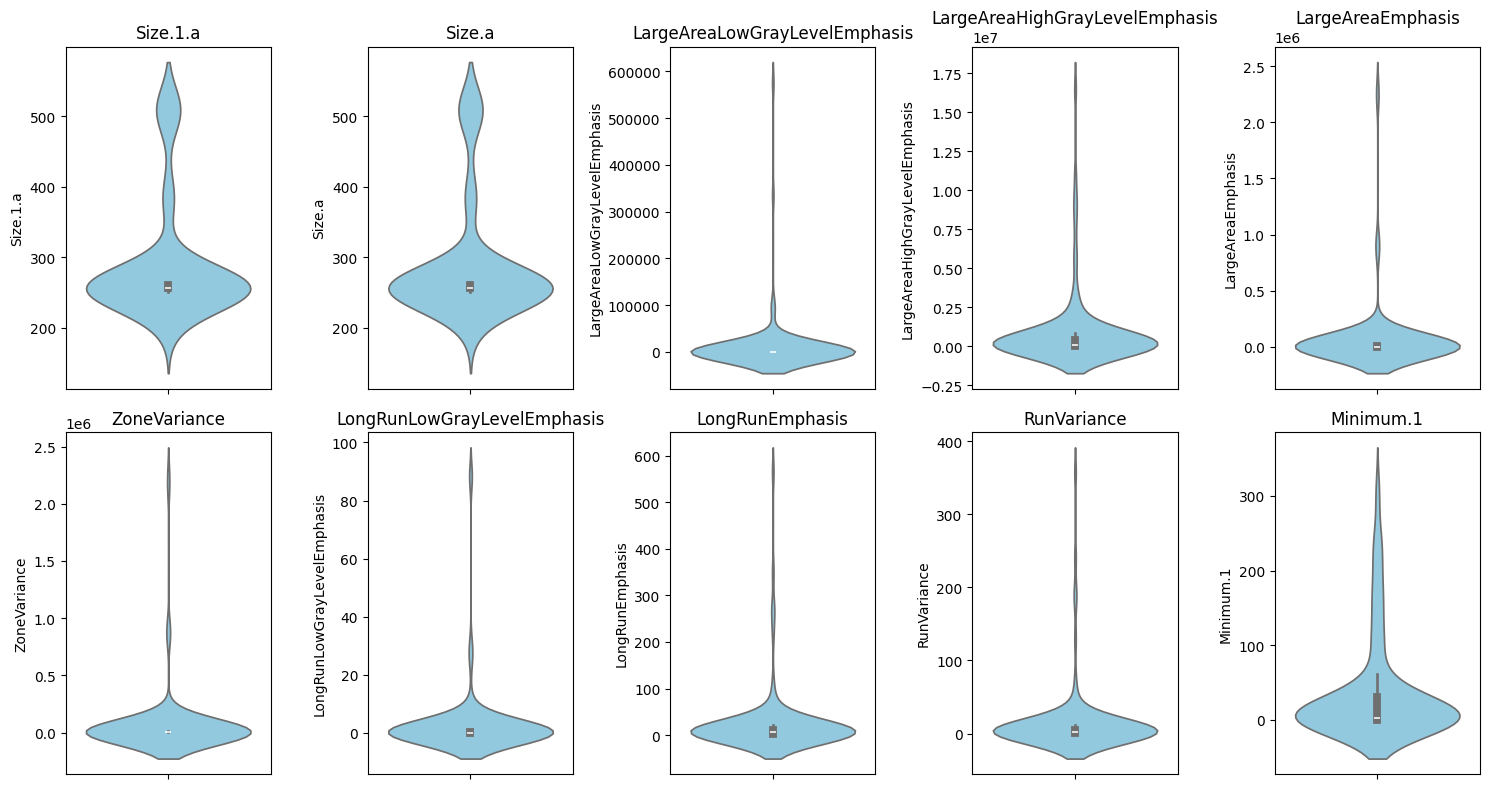

In [155]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers_count = ((df < (Q1 - 6* IQR)) | (df > (Q3 + 6* IQR))).sum()

totalOut = sum(x > 0 for x in outliers_count)
print('total out: ', totalOut)
# Seleccionar las 10 columnas con mas valores atipicos
top_outlier_cols = outliers_count.sort_values(ascending=False).head(10).index.tolist()

outliers_count.sort_values(ascending=False).index.tolist()
print(len(outliers_count.sort_values(ascending=False).index.tolist()))

plt.figure(figsize=(15, 8))
for i, col in enumerate(top_outlier_cols):
    plt.subplot(2, 5, i + 1)  
    sns.violinplot(y=df[col], color="skyblue")
    plt.title(f"{col}")

plt.tight_layout()
plt.show()

No creo que eliminar ouliers sea correcto en este contexto pero con los pocos datos que tenemos es riesgoso para la clasificacion dejarlos asi. Creeria que lo mejor que podriamos hacer es traer los outliers mas cerca a la media para normalizar un poco la distribucion. 

Si usamos solo 1.5 rangos interquartiles estamos abarcando literalmente todas las columnas. Todas las columnas tienen valores atipicos respecto a este rango y NO se pueden limitar dentro de este porque estariamos falseando la totalidad de los datos con distribuciones normales pero falsas. 

Propongo, como minimo, 6 rangos interquartiles. En este caso son 1/3 de las columnas las que se compactarian dentro del rango, manteniendo una distribucion representativa de la realidad. Igual Espero que probemos con varios rangos mayores para determinar el adecuado. 

**Reasoning**:
Based on the EDA, there are no missing values or duplicated rows.  The next step is to apply PCA and create a non-supervised model.



In [ ]:
import pandas as pd

# Función para detectar y tratar outliers utilizando el IQR
def tratar_outliers_iqr(df):
    # Selecciona solo las columnas numéricas
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    for col in num_cols:
        # Calcular Q1 (primer cuartil), Q3 (tercer cuartil) y IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definir límites inferior y superior para los outliers
        lower_bound = Q1 - 6 * IQR
        upper_bound = Q3 + 6 * IQR

        # Imprimir los límites de cada columna
        print(f"{col}: Limite inferior={lower_bound}, Limite superior={upper_bound}")

        # Reemplazar los valores por los límites (capping)
        df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

    return df

# Aplicar la función para tratar los outliers en el DataFrame
df = tratar_outliers_iqr(df)


Spacing.a: Limite inferior=-0.05468750000000133, Limite superior=1.7500000000000018
Spacing.b: Limite inferior=-0.054687500000001665, Limite superior=1.7500000000000022
Spacing.c: Limite inferior=-14.749999990109758, Limite superior=21.99999998681301
Size.a: Limite inferior=244.0, Limite superior=272.0
Size.b: Limite inferior=64.0, Limite superior=512.0
Size.c: Limite inferior=-432.0, Limite superior=632.0
Spacing.1.a: Limite inferior=-0.05468750000000133, Limite superior=1.7500000000000018
Spacing.1.b: Limite inferior=-0.054687500000001665, Limite superior=1.7500000000000022
Spacing.1.c: Limite inferior=-14.749999990109758, Limite superior=21.99999998681301
Size.1.a: Limite inferior=244.0, Limite superior=272.0
Size.1.b: Limite inferior=64.0, Limite superior=512.0
Size.1.c: Limite inferior=-432.0, Limite superior=632.0
BoundingBox.a: Limite inferior=-130.0, Limite superior=346.0
BoundingBox.b: Limite inferior=-44.0, Limite superior=274.5
BoundingBox.c: Limite inferior=-251.75, Limite 

In [157]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Scale the data
x = df.drop('Strength', axis=1)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply PCA
pca = PCA(n_components=0.90)  # Keep components explaining 95% of the variance
x_pca = pca.fit_transform(x_scaled)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0) # Try 3 clusters initially
kmeans.fit(x_pca)
df['cluster'] = kmeans.labels_
display(df.head())


/tmp/ipykernel_6799/4265591355.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cluster'] = kmeans.labels_


,Spacing.a,Spacing.b,Spacing.c,Size.a,Size.b,Size.c,Spacing.1.a,Spacing.1.b,Spacing.1.c,Size.1.a,...,SmallAreaLowGrayLevelEmphasis,ZoneEntropy,ZonePercentage,ZoneVariance,Busyness,Coarseness,Complexity,Contrast.1,Strength,cluster
Id,,,,,,,,,,,,,,,,,,,,,
0.783201,1.000000,1.000000,1.0,256.0,256,176,1.000000,1.000000,1.0,256.0,...,0.045654,4.696937,0.057143,4440.166667,4.608822,0.007719,5.665917,0.021313,0.109595,0
0.729412,1.000000,1.000000,1.0,256.0,256,176,1.000000,1.000000,1.0,256.0,...,0.047595,5.422075,0.103538,829.483942,6.779884,0.004074,11.919254,0.028828,0.088929,0
0.662097,0.976563,0.976562,1.0,256.0,256,176,0.976563,0.976562,1.0,256.0,...,0.031491,5.453404,0.162454,945.911273,4.835655,0.002515,32.396035,0.017710,0.130043,0
0.782308,0.898438,0.898438,0.9,256.0,256,192,0.898438,0.898438,0.9,256.0,...,0.037158,5.047446,0.086413,2961.200744,2.635198,0.006769,12.410246,0.021700,0.228678,0
0.585369,0.718750,0.718750,6.5,260.0,320,26,0.718750,0.718750,6.5,260.0,...,0.005191,5.763565,0.272459,85.110375,0.527647,0.006528,96.167007,0.037276,0.891463,1


**Reasoning**:
The next step is to create an SVM model and evaluate its performance.



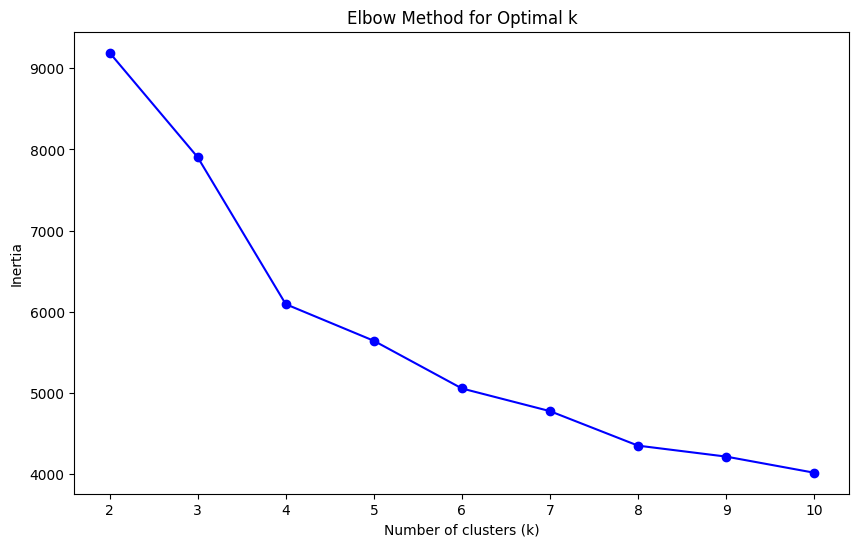

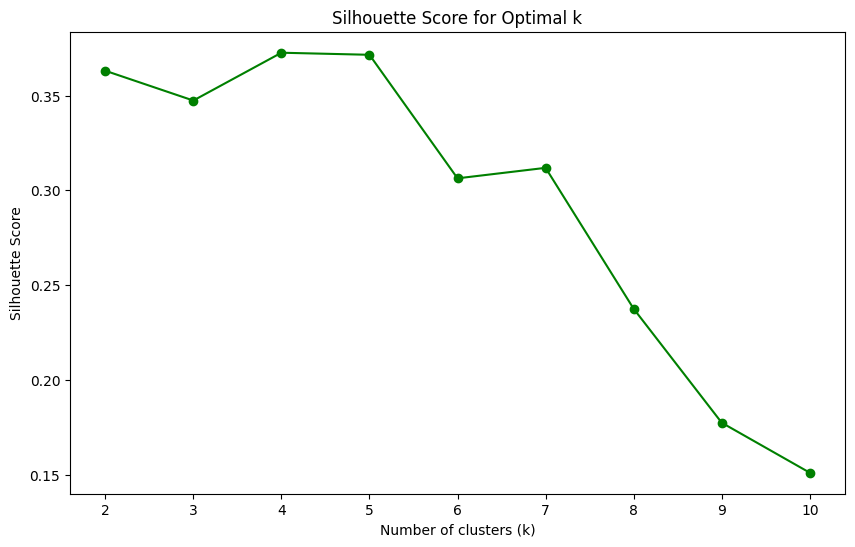

El número óptimo de clusters es: 4
          Spacing.a  Spacing.b  Spacing.c  Size.a  Size.b  Size.c  \
Id                                                                  
0.783201   1.000000   1.000000        1.0   256.0     256     176   
0.729412   1.000000   1.000000        1.0   256.0     256     176   
0.662097   0.976563   0.976562        1.0   256.0     256     176   
0.782308   0.898438   0.898438        0.9   256.0     256     192   
0.585369   0.718750   0.718750        6.5   260.0     320      26   

          Spacing.1.a  Spacing.1.b  Spacing.1.c  Size.1.a  ...  \
Id                                                         ...   
0.783201     1.000000     1.000000          1.0     256.0  ...   
0.729412     1.000000     1.000000          1.0     256.0  ...   
0.662097     0.976563     0.976562          1.0     256.0  ...   
0.782308     0.898438     0.898438          0.9     256.0  ...   
0.585369     0.718750     0.718750          6.5     260.0  ...   

          SmallAre

In [158]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Preprocesamiento: Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)  # Escalar las características del dataframe

# Encontrar el número óptimo de clusters usando el Elbow Method
inertia = []
silhouette_scores = []
k_values = range(2, 11)  # Rango de posibles valores de k (número de clusters)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

    # Silhouette Score
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Elbow Method Plot (gráfico del codo)
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Silhouette Score Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

# Seleccionar el mejor número de clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"El número óptimo de clusters es: {optimal_k}")

# Aplicar KMeans con el número óptimo de clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=0)
df['cluster'] = kmeans_optimal.fit_predict(X_scaled)

# Visualizar los primeros registros del dataframe con los clusters asignados
print(df.head())


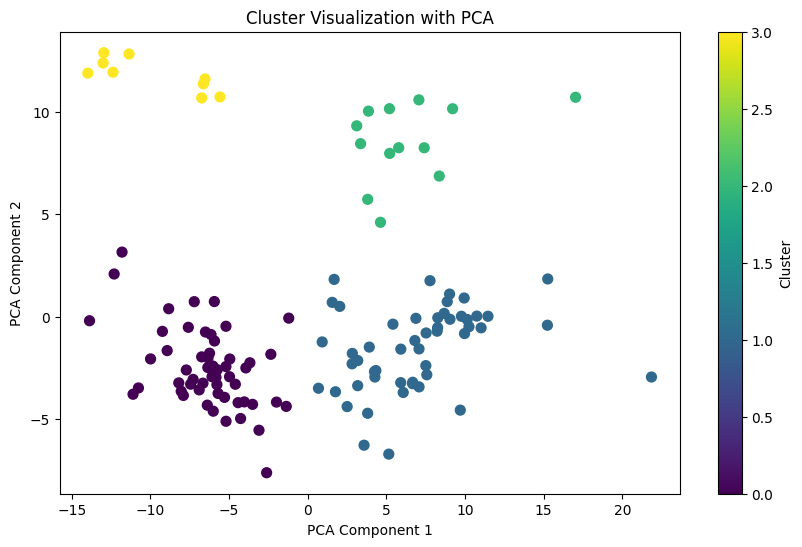

In [159]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducir los datos a 2 dimensiones usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un scatter plot de los datos con los clusters asignados
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()


In [160]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = df.drop(['Strength', 'cluster'], axis=1)
y = df['Strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Train an SVM model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.9375636703936758
R-squared: 0.4934437720504382


**Reasoning**:
The initial SVM model has poor performance. Now, improve the model by tuning hyperparameters using GridSearchCV.



In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear un diccionario con los modelos que quieres probar
modelos = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=0),
    'Gradient Boosting': GradientBoostingRegressor(random_state=0),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Crear un diccionario para almacenar los resultados
resultados = {}

# Probar cada modelo
for nombre_modelo, modelo in modelos.items():
    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = modelo.predict(X_test)

    # Evaluar el modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Guardar los resultados
    resultados[nombre_modelo] = {'MSE': mse, 'R2': r2}
    print(f"\nModelo: {nombre_modelo}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

# Mostrar los resultados de todos los modelos
print("\nResultados finales:")
for nombre_modelo, metricas in resultados.items():
    print(f"{nombre_modelo}: MSE={metricas['MSE']}, R2={metricas['R2']}")



Modelo: Linear Regression
Mean Squared Error: 16.06373334417335
R-squared: -7.67907367421277

Modelo: Random Forest
Mean Squared Error: 0.23985923501121953
R-squared: 0.8704064660748502

Modelo: Gradient Boosting
Mean Squared Error: 0.31082680666713214
R-squared: 0.8320634003824001

Modelo: K-Nearest Neighbors
Mean Squared Error: 1.0790245278573485
R-squared: 0.41701389254239374

Resultados finales:
Linear Regression: MSE=16.06373334417335, R2=-7.67907367421277
Random Forest: MSE=0.23985923501121953, R2=0.8704064660748502
Gradient Boosting: MSE=0.31082680666713214, R2=0.8320634003824001
K-Nearest Neighbors: MSE=1.0790245278573485, R2=0.41701389254239374


In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],        # Número de árboles
    'max_depth': [None, 10, 20, 30],       # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],       # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],         # Mínimo de muestras en una hoja
    'bootstrap': [True]             # Si utilizar bootstrap o no
}

# Create a GridSearchCV object for RandomForest
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=0),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


KeyboardInterrupt: 